# Online Retail Exploratory Data Analysis with Python

## Table of content

### Project overview
### Data source
### Used library
### Import libraries and Load the data
### Explore and Clean the Data
### Analysis
### Result/Findings
### Recomendations
### Limitations

### Project overview

In this project, I'll be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. The goal is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

### Data source
https://docs.google.com/spreadsheets/d/14UQrIVdeHlMuqbeFAPfE7_j_rXAd9z89/edit?usp=drive_link&ouid=109037439634761704992&rtpof=true&sd=true


### Used library

- Pandas
- Numpy
- Pyplot

### Import libraries and Load the data

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

In [159]:
df = pd.read_excel("../Perform exploratory data analysis on retail data with Python/Online Retail.xlsx")

In [15]:
df.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Explore and Clean the Data

1. Let's understand the data set structure howw many rows/columns and data type of each column.

In [103]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [143]:
df.shape

(541909, 8)

2. Then perform the basic cleaning by removing rows with duplicated values or null.

In [160]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [161]:
df = df.drop_duplicates()
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [162]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [163]:
df = df.dropna()    # Dropping the missing values.
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

3. The data type of column CustomerID should not be consider as number --> convert to type object

In [164]:
df[['CustomerID']] = df[['CustomerID']].astype(object)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

4. Check column Quantity and UnitPrice and remove if there are any negative values.

In [109]:
df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


In [110]:
df.sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
379913,569716,22778,GLASS CLOCHE SMALL,2,2011-10-06 08:17:00,0.00,15804.0,United Kingdom
446793,574920,22899,CHILDREN'S APRON DOLLY GIRL,1,2011-11-07 16:34:00,0.00,13985.0,United Kingdom
314745,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,2011-08-26 14:19:00,0.00,14646.0,Netherlands
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.00,14646.0,Netherlands
314747,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.00,14646.0,Netherlands
...,...,...,...,...,...,...,...,...
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom


In [165]:
df = df[df['Quantity'] > 0] #Dropping Item with quantity < 0. 
df.shape

(392732, 8)

5. Create a column with PurchaseMonth, DayOfWeek and drop unessessary columns (InvoiceDate,StockCode)

In [166]:
df['PurchaseMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df = df.drop(['InvoiceDate','StockCode'], axis =1)
df.head(5) 

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country,PurchaseMonth,DayOfWeek,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,Wednesday,15.30
1,536365,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,Wednesday,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34


Check if there are any outliers

6. Check and remove outliers by using IQR (Interquartile Range) method

<AxesSubplot:xlabel='UnitPrice'>

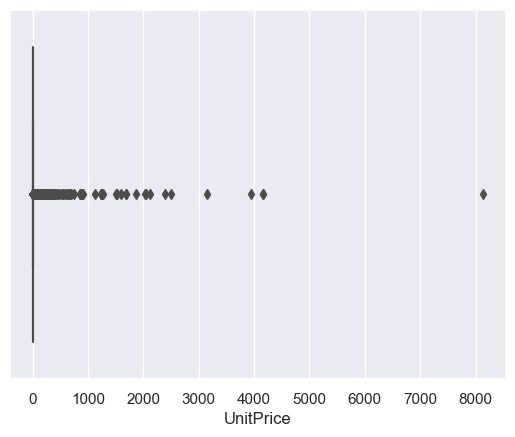

In [113]:
sns.boxplot(x=df['UnitPrice'])

<AxesSubplot:xlabel='Quantity'>

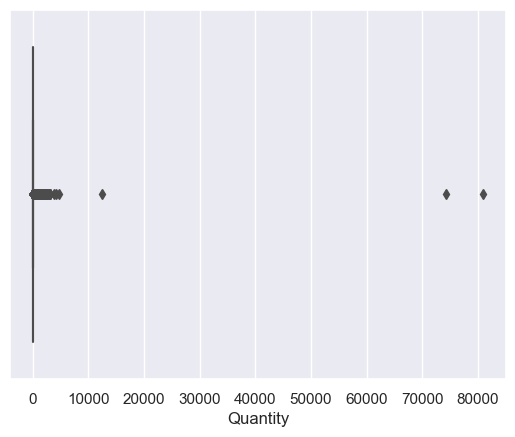

In [114]:
sns.boxplot(x=df['Quantity'])

In [167]:
df['PurchaseMonth'] = df['PurchaseMonth'].astype(object) #convert to object type to remove outliers

In [168]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity      10.00
UnitPrice      2.50
TotalPrice    14.85
dtype: float64


In [169]:
df = df[~((df.lt(Q1 - 1.5 * IQR)) |(df.gt(Q3 + 1.5 * IQR))).any(axis=1)] #remove outliers
df.shape

(323756, 9)

### Analysis

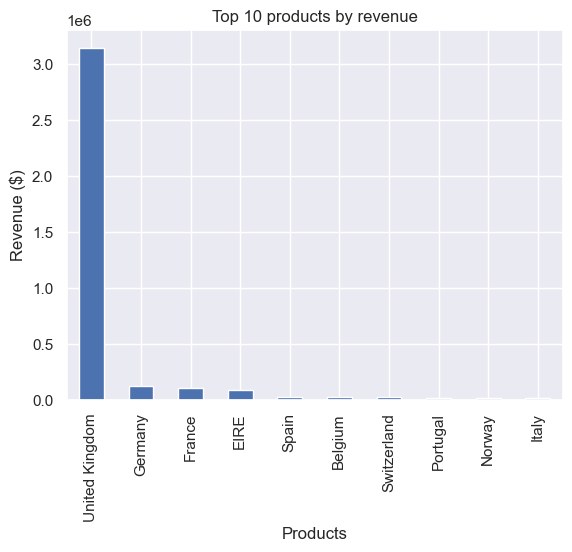

In [201]:
most_busy_day = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
most_busy_day.plot(kind='bar')
plt.title('Top 10 products by revenue')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Revenue ($)')
plt.show()

As we can see, the data collect is mostly from "United Kingdom", therefore the dataset heavily bias towards United Kingdom products sales.

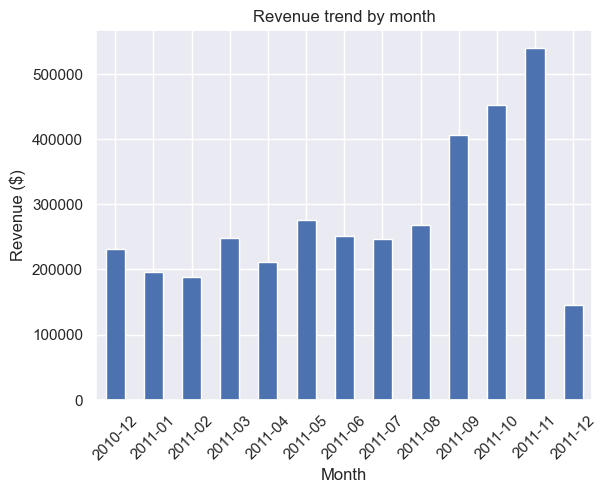

In [170]:
revenue_trend_by_month = df.groupby('PurchaseMonth')['TotalPrice'].sum()
revenue_trend_by_month.plot(kind='bar')
plt.title('Revenue trend by month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.show()

The 'Revenue trend by month' graph shows that the revenue increased steadily over the year and spike up from September through November. However, we don't have enough data from December 2011 to say that whether the spike/trend will continue to increase or decrease.

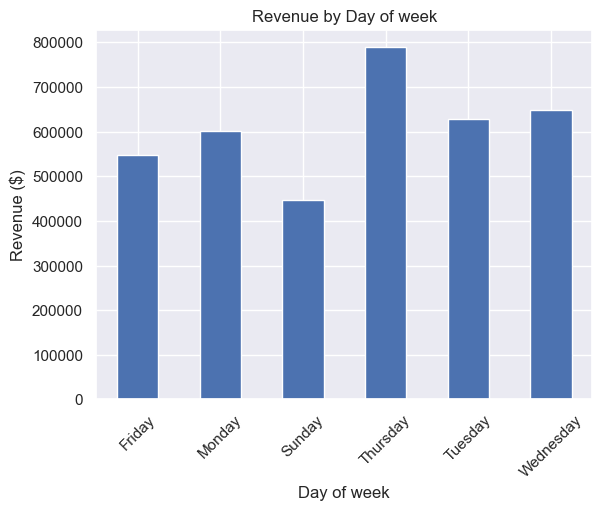

In [171]:
most_busy_day = df.groupby('DayOfWeek')['TotalPrice'].sum()
most_busy_day.plot(kind='bar')
plt.title('Revenue by Day of week')
plt.xlabel('Day of week')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.show()

As we can see in this plot, the busiest day in the week is Thursday, where most of the revenue come from. The least busy day is Sunday.

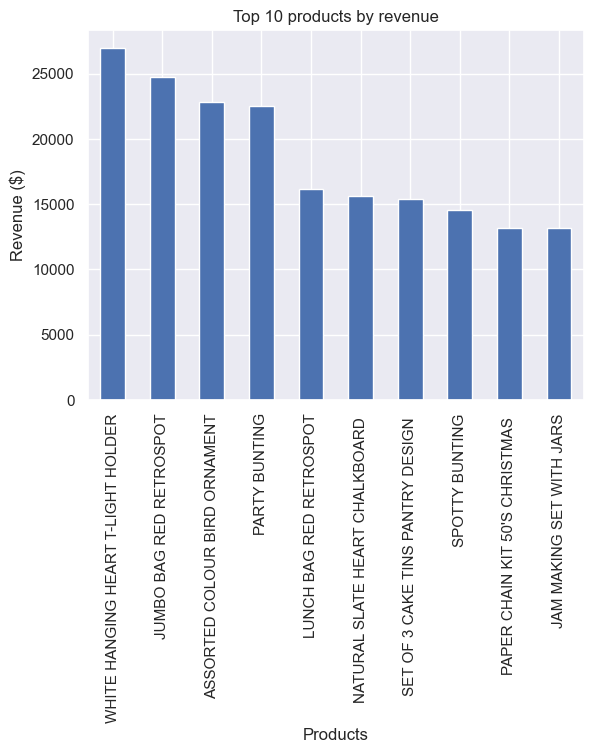

In [197]:
most_busy_day = df.groupby('Description')['TotalPrice'].sum().nlargest(10)
most_busy_day.plot(kind='bar')
plt.title('Top 10 products by revenue')
plt.xlabel('Products')
plt.xticks(rotation=90)
plt.ylabel('Revenue ($)')
plt.show()

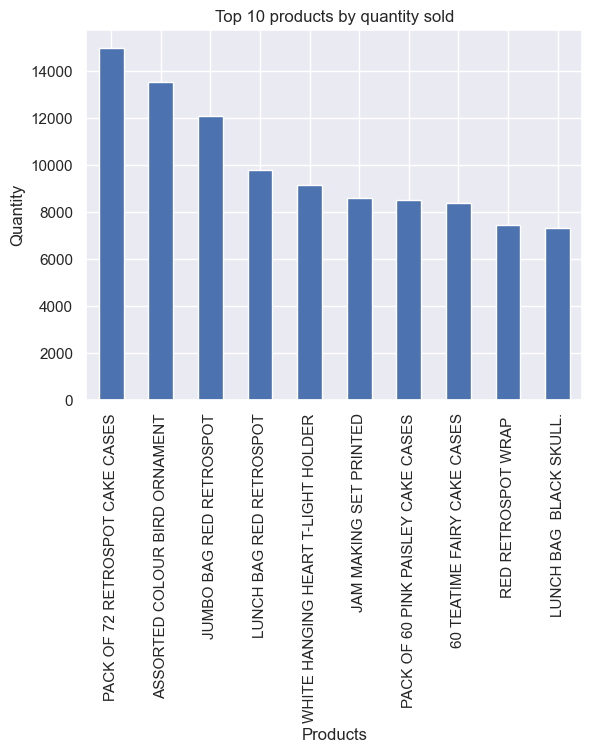

In [198]:
most_busy_day = df.groupby('Description')['Quantity'].sum().nlargest(10)
most_busy_day.plot(kind='bar')
plt.title('Top 10 products by quantity sold')
plt.xlabel('Products')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.show()

### Result/Findings

- We found that the revenue steadily increase over time, and spike up since September till November (we don't have enough data from December 2011 to conclude if this trend continued till the end of the year).
- Thursday is the busiest day in the week and Sunday is the least busy day.
- There are no significant different within the top sales products.

### Recomendations

- Get more data from other countries to find out which trend are applicable to other countries and which products bring the most revenue for each invidual country.
- Based on the busiest day data, I reccommend alloccate more people on Thursday and less people to work on Sunday to optimize the workload and increase efficiency.
- We can increase the price for the top products that are in high demand (sold in high quantity) to increase revenue.

### Limitations

The data collect is mostly from "United Kingdom", therefore the dataset heavily bias towards United Kingdom products sales. We an seperate this data set into 2 parts, one specifically target United Kingdom and the other to analyze the other countries. However, the data has very limited/missing information for other countries, it won't be sufficient to draw an accurate conclusion.